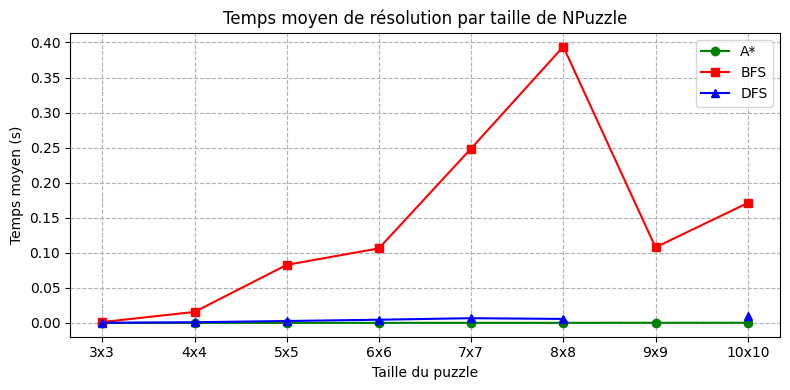

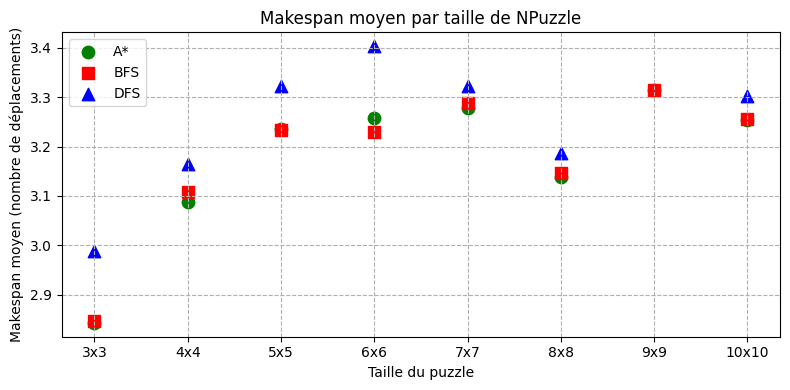

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Lire et préparer les CSV
base = Path('puzzles/solutions')
df_dfs   = pd.read_csv(base/'summary_dfs.csv')
df_bfs   = pd.read_csv(base/'summary_bfs.csv')
df_astar = pd.read_csv(base/'summary_astar.csv')

def prep(df, label):
    df = df.rename(columns={
        'puzzle_file':'puzzle',
        'duration_s':'time',
        'makespan':'span'
    })
    df['algo'] = label
    # extraire "3x3_len5" depuis "npuzzle_3x3_len5_12.txt"
    df['group'] = df['puzzle'].str.extract(r'npuzzle_([^_]+_[^_]+)_\d+\.txt')[0]
    # ne garder que la taille : "3x3" / "4x4" / ...
    df['size'] = df['group'].str.split('_').str[0]
    return df

dfs   = prep(df_dfs,   'DFS')
bfs   = prep(df_bfs,   'BFS')
astar = prep(df_astar, 'A*')

all_df = pd.concat([bfs, dfs, astar], ignore_index=True)

# 2) Moyennes par taille et par algo
time_mean_size = all_df.groupby(['size','algo'])['time'].mean().unstack('algo')
span_mean_size = all_df.groupby(['size','algo'])['span'].mean().unstack('algo')

# 3) Ordonner les tailles dans l'ordre croissant de n
#    ex: ['3x3','4x4',...,'10x10']
sizes = sorted(time_mean_size.index, key=lambda s: int(s.split('x')[0]))
x = np.arange(len(sizes))
time_mean_size = time_mean_size.loc[sizes]
span_mean_size = span_mean_size.loc[sizes]

# 4) Tracer les temps moyens (linéaire, ligne par algo)
plt.figure(figsize=(8,4))
for algo, color, marker in [
    ('A*','green','o'),
    ('BFS','red','s'),
    ('DFS','blue','^')
]:
    if algo in time_mean_size:
        plt.plot(x, time_mean_size[algo],
                 label=algo,
                 color=color,
                 marker=marker,
                 linestyle='-')
plt.xticks(x, sizes)
plt.title("Temps moyen de résolution par taille de NPuzzle")
plt.xlabel("Taille du puzzle")
plt.ylabel("Temps moyen (s)")
plt.grid(True, ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Tracer le makespan moyen (linéaire, points)
plt.figure(figsize=(8,4))
for algo, color, marker in [
    ('A*','green','o'),
    ('BFS','red','s'),
    ('DFS','blue','^')
]:
    if algo in span_mean_size:
        plt.scatter(x, span_mean_size[algo],
                    label=algo,
                    color=color,
                    marker=marker,
                    s=80)
plt.xticks(x, sizes)
plt.title("Makespan moyen par taille de NPuzzle")
plt.xlabel("Taille du puzzle")
plt.ylabel("Makespan moyen (nombre de déplacements)")
plt.grid(True, ls="--")
plt.legend()
plt.tight_layout()
plt.show()
